Equation 1:
Eq(0.2*c*s, 0.35)
Equation 2
Eq(c*(0.2 - 0.3875*s), -0.1)
 
Values of 2 unknown variable are as follows:
(2.89062500000000, 0.605405405405405)
2.89062500000000
0.605405405405405


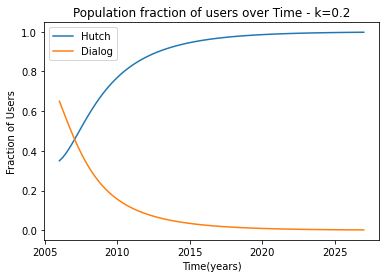

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Eq, solve


c, s = symbols('c,s')

# defining equations
eq1 = Eq((c*(((1-0)*(1-0.2)*s*(1-0.75)**1) - (0*(1-s)*(1-0)**1))), 0.35)
print("Equation 1:")
print(eq1)
eq2 = Eq((c*(((1-0.75)*(1-0.2)*(1-s)*(1-0)**1) - (0.75*s*(1-0.75)**1))), -0.1)
print("Equation 2")
print(eq2)

# solving the equation
print(" ")
print("Values of 2 unknown variable are as follows:")
ans = solve((eq1, eq2), (c, s))
a = ans[0]
print(a)
c_value = a[0]
print(c_value)
s_value = a[1]
print(s_value)


def dSdx(t,P,c1,s1):
    h, g = P
    return [c1*(((1-h)*(1-0.2)*s1*(1-g)**1) - (h*(1-s1)*(1-h)**1)),
            c1*(((1-g)*(1-0.2)*(1-s1)*(1-h)**1) - (g*s1*(1-g)**1))]

h_0 = 0.35
g_0 = 0.65
P_0 = (h_0 ,g_0)

t = np.linspace(2006,2027,100)
c1 = c_value
s1 = s_value
sol = odeint(dSdx, y0=P_0, t=t, tfirst=True,args=(c1,s1))

h_sol = sol.T[0]  #y1 = first cosolve((eq1, eq2), (c, s)))lumn of sol
g_sol = sol.T[1]  #y2 = 2nd column of sol

plt.plot(t,h_sol,label="Hutch")
plt.plot(t,g_sol,label="Dialog")
plt.xlabel("Time(years)")
plt.ylabel("Fraction of Users")
plt.title("Population fraction of users over Time - k=0.2")
plt.legend()
plt.show()
